In [ ]:
import sys
import os
import numpy as np
import tensorflow as tf


py_file_location = "..."
os.path.abspath(os.path.join(os.path.dirname(py_file_location), os.path.pardir))

from src.close_policy import *
from src.utils import *
from src.metrics import *
from src.DNN_metrics import *
from src.DNN_model import *
from src.loss_function import *
from src.data_generator import *


tf.device('GPU:1') 

## load dataset

In [2]:
train_size = int(1E6)

test_size = int(2E5) 

# # choose your directory path  
project_sub_path = "dataset"
  
# Parent Directory path
parent_dir = ""


### Train ###

dataset_train = np.load(os.path.join(parent_dir,project_sub_path,'dataset_train.npz'))

g_PP_tr = dataset_train['g_PP'][:train_size]
g_PS_tr = dataset_train['g_PS'][:train_size]
g_PR_tr = dataset_train['g_PR'][:train_size]
g_SP_tr = dataset_train['g_SP'][:train_size]
g_SS_tr = dataset_train['g_SS'][:train_size]
g_SR_tr = dataset_train['g_SR'][:train_size]
g_RP_tr = dataset_train['g_RP'][:train_size]
g_RS_tr = dataset_train['g_RS'][:train_size]

x_train = np.stack([g_RP_tr, g_PP_tr, g_SR_tr, g_PR_tr, g_SS_tr, g_RS_tr, g_SP_tr, g_PS_tr], axis=1)


### Test ### 

dataset_test = np.load(os.path.join(parent_dir,project_sub_path,'dataset_test.npz'))


g_PP_ts = dataset_test['g_PP'][:test_size]
g_PS_ts = dataset_test['g_PS'][:test_size]
g_PR_ts = dataset_test['g_PR'][:test_size]
g_SP_ts = dataset_test['g_SP'][:test_size]
g_SS_ts = dataset_test['g_SS'][:test_size]
g_SR_ts = dataset_test['g_SR'][:test_size]
g_RP_ts = dataset_test['g_RP'][:test_size]
g_RS_ts = dataset_test['g_RS'][:test_size]

R_S_ts = dataset_test['R_S']
alpha_ts = dataset_test['alpha']
P_R_ts = dataset_test['P_R']
P_S_ts = dataset_test['P_S']


x_test = np.stack([g_RP_ts, g_PP_ts, g_SR_ts, g_PR_ts, g_SS_ts, g_RS_ts, g_SP_ts, g_PS_ts], axis=1)

y_test = np.stack([R_S_ts, alpha_ts, P_R_ts, P_S_ts], axis=1)




# Parameters

In [3]:
P_P, tau = 10.0, 0.25
Lambda = 10**(0.5)
metrics = [opportunistic_rate_DF(Lambda, tau, P_P), outage_DF(Lambda, tau, P_P), delta_DF(Lambda, tau, P_P), delta_out_DF(Lambda, tau, P_P)] 

VS = 0.2 # validation_split

Epochs = 1000 # Epochs number

BS = 4096 # batch_size

LD = 10**(0.5)

LR = 10**-4

DNN_size_dir = "DNN_size_"



# Training phase for neurons choice

In [ ]:
# neurons : 64, 128, 256

neurons = [64, 128, 256]
for neuron in neurons:
    
    model = neurons_size(x_train, loss_DF(LD,tau), metrics,'sigmoid', custom_sigmoid, custom_sigmoid, LR, neuron) #lr_v
    history = model.fit(x_train, x_train, epochs=Epochs, batch_size=BS, validation_split = VS)#validation_split = VS)
    model.save(DNN_size_dir+str(neuron)+'.h5')
    np.save(DNN_size_dir+str(neuron)+'.npy',history.history)



# Training phase for hidden layers choice

In [ ]:
# layers : represent the hidden layers number (from 1 to 4 hidden layers)

layers = np.arange(1, 5 ,1)

for layer in layers:
    
    model = layers_size(x_train, loss_DF(LD,tau), metrics,'sigmoid', custom_sigmoid, custom_sigmoid, LR, layer) #lr_v

    history = model.fit(x_train, x_train, epochs=Epochs, batch_size=BS, validation_split = VS)#validation_split = VS)
    model.save(DNN_size_dir+str(layer)+'.h5')
    np.save(DNN_size_dir+str(layer)+'.npy',history.history)




In [6]:
tau = 0.25
root_dir = ''
hist_one_h_layers = tf.keras.models.load_model(root_dir+'DNN_size_1.h5', custom_objects={'DF_loss':loss_DF(Lambda,tau),'opportunistic_rate':opportunistic_rate_DF(Lambda, tau, P_P), 'outage':outage_DF(Lambda, tau, P_P),'Delta': delta_DF(Lambda, tau, P_P), 'delta_out':delta_out_DF(Lambda, tau, P_P), 'V_Qos':quality_of_service_violation_DF(tau=0.25),"custom_sigmoid":custom_sigmoid})

hist_two_h_layers = tf.keras.models.load_model(root_dir+'DNN_size_2.h5', custom_objects={'DF_loss':loss_DF(Lambda,tau),'opportunistic_rate':opportunistic_rate_DF(Lambda, tau, P_P), 'outage':outage_DF(Lambda, tau, P_P),'Delta': delta_DF(Lambda, tau, P_P), 'delta_out':delta_out_DF(Lambda, tau, P_P), 'V_Qos':quality_of_service_violation_DF(tau=0.25),"custom_sigmoid":custom_sigmoid})

hist_three_h_layers = tf.keras.models.load_model(root_dir+'DNN_size_3.h5', custom_objects={'DF_loss':loss_DF(Lambda,tau),'opportunistic_rate':opportunistic_rate_DF(Lambda, tau, P_P), 'outage':outage_DF(Lambda, tau, P_P),'Delta': delta_DF(Lambda, tau, P_P), 'delta_out':delta_out_DF(Lambda, tau, P_P), 'V_Qos':quality_of_service_violation_DF(tau=0.25),"custom_sigmoid":custom_sigmoid})

hist_four_h_layers = tf.keras.models.load_model(root_dir+'DNN_size_128.h5', custom_objects={'DF_loss':loss_DF(Lambda,tau),'opportunistic_rate':opportunistic_rate_DF(Lambda, tau, P_P), 'outage':outage_DF(Lambda, tau, P_P),'Delta': delta_DF(Lambda, tau, P_P), 'delta_out':delta_out_DF(Lambda, tau, P_P), 'V_Qos':quality_of_service_violation_DF(tau=0.25),"custom_sigmoid":custom_sigmoid})

hist_half_four_layers = tf.keras.models.load_model(root_dir+'DNN_size_64.h5', custom_objects={'DF_loss':loss_DF(Lambda,tau),'opportunistic_rate':opportunistic_rate_DF(Lambda, tau, P_P), 'outage':outage_DF(Lambda, tau, P_P),'Delta': delta_DF(Lambda, tau, P_P), 'delta_out':delta_out_DF(Lambda, tau, P_P), 'V_Qos':quality_of_service_violation_DF(tau=0.25),"custom_sigmoid":custom_sigmoid})

hist_double_four_layers = tf.keras.models.load_model(root_dir+'DNN_size_256.h5', custom_objects={'DF_loss':loss_DF(Lambda,tau),'opportunistic_rate':opportunistic_rate_DF(Lambda, tau, P_P), 'outage':outage_DF(Lambda, tau, P_P),'Delta': delta_DF(Lambda, tau, P_P), 'delta_out':delta_out_DF(Lambda, tau, P_P), 'V_Qos':quality_of_service_violation_DF(tau=0.25),"custom_sigmoid":custom_sigmoid})


predictions_1 = hist_one_h_layers.predict(x_test)
predictions_2 = hist_two_h_layers.predict(x_test)

predictions_3 = hist_three_h_layers.predict(x_test)
predictions_4 = hist_four_h_layers.predict(x_test)


predictions_half = hist_half_four_layers.predict(x_test)
predictions_double = hist_double_four_layers.predict(x_test)


predictions_1 = hist_one_h_layers.predict(x_test)
predictions_2 = hist_two_h_layers.predict(x_test)

predictions_3 = hist_three_h_layers.predict(x_test)
predictions_4 = hist_four_h_layers.predict(x_test)


predictions_half = hist_half_four_layers.predict(x_test)
predictions_double = hist_double_four_layers.predict(x_test)




6250/6250 [==============================] - 10s 2ms/step


In [8]:
rate_gap_one_hlayers, mean_res_one_hlayers, max_res_one_hlayers, mean_outage_one_hlayers, outage_one_hlayers = stats(x_test, y_test, predictions_1)

rate_gap_two_hlayers, mean_res_two_hlayers, max_res_two_hlayers, mean_outage_two_hlayers, outage_two_hlayers = stats(x_test, y_test, predictions_2)

rate_gap_three_hlayers, mean_res_three_hlayers, max_res_three_hlayers, mean_outage_three_hlayers, outage_three_hlayers = stats(x_test, y_test, predictions_3)

rate_gap_four_hlayers, mean_res_four_hlayers, max_res_four_hlayers, mean_outage_four_hlayers, outage_four_hlayers = stats(x_test, y_test, predictions_4)


rate_gap_half_hlayers, mean_res_half_hlayers, max_res_half_hlayers, mean_outage_half_hlayers, outage_half_hlayers = stats(x_test, y_test, predictions_half)

rate_gap_double_hlayers, mean_res_double_hlayers, max_res_double_hlayers, mean_outage_double_hlayers, outage_double_hlayers = stats(x_test, y_test, predictions_double)


rate_gap_layers = np.stack([[rate_gap_one_hlayers],[rate_gap_two_hlayers],[rate_gap_three_hlayers],[rate_gap_four_hlayers]])

outage_layers = np.stack([[outage_one_hlayers],[outage_two_hlayers],[outage_three_hlayers],[outage_four_hlayers]])

rate_gap_neurons = np.stack([[rate_gap_half_hlayers], [rate_gap_four_hlayers], [rate_gap_double_hlayers]])

outage_neurons = np.stack([ [outage_half_hlayers], [outage_four_hlayers],[outage_double_hlayers]])

rate_gap_layers, rate_gap_neurons = np.squeeze(rate_gap_layers), np.squeeze(rate_gap_neurons)
outage_layers, outage_neurons = np.squeeze(outage_layers), np.squeeze(outage_neurons)

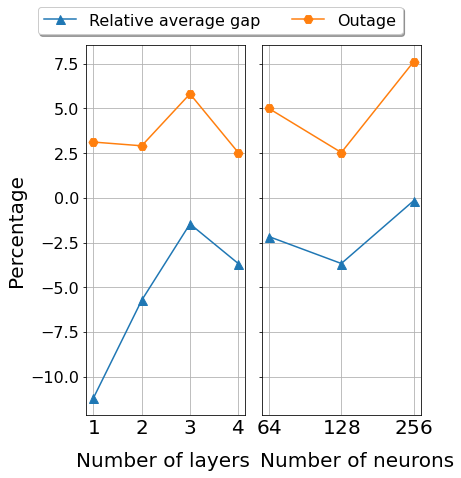

In [11]:
ref = [1, 3, 5, 7]

ref_2 = [1, 4, 7]


fig, ax = plt.subplots(1, 2, constrained_layout=True, sharex=False, sharey=True) # , figsize=(10, 5)

fig.set_figheight(6, 15)

#-------------- First Plot --------------#
ax[0].grid()

ax[0].plot(ref, rate_gap_layers*100, label='Relative average gap', marker='^',markersize=9)

ax[0].plot(ref, outage_layers, label = 'Outage', marker='H', markersize=9)

ax[0].set_xlabel("Number of layers ", fontsize= 20, labelpad=14)

ax[0].set_ylabel(r'Percentage', fontsize= 20)

ax[0].set_xticks(ref)

ax[0].tick_params(labelsize=16)

ax[0].set_xticklabels(["$1$", "$2$", "$3$", "$4$"], fontsize=20)
ax[0].tick_params(axis="x", which="both", length=0.)
ax[0].xaxis.set_label_coords(0.5, -0.1)



#-------------- Second Plot --------------#


ax[1].grid()

ax[1].plot(ref_2, rate_gap_neurons*100, marker='^', markersize=9)

ax[1].plot(ref_2, outage_neurons, marker='H', markersize=9)

ax[1].set_xticks(ref_2)

ax[1].set_xticklabels([r'$64$', "$128$", '$256$'], fontsize=20)


ax[1].set_xlabel("Number of neurons", fontsize= 20)


ax[1].tick_params(axis="x", which="both", length=0.)
ax[1].xaxis.set_label_coords(0.6, -0.1)


fig.legend(loc='upper center', bbox_to_anchor=(0.5, 1.1),
          ncol=3, fancybox=True, shadow=True, fontsize= 16)

plt.savefig('archi_plot.pdf', bbox_inches='tight')

plt.show()



